In [1]:
%pip install prophet
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import de librería
import os
from prophet import Prophet
import pandas as pd

/Users/jorgebarquero/anaconda3/envs/Enae_SeriesTemporales/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

,DUA,Item del DUA,Fecha DUA,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Total Ley 6946 US$,% DAI,Total DAI US$,COSTO por PROCOMER US$,% S.C,Total SC US$,Otros impuestos US$,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [4]:
# Assuming 'data' is your original DataFrame
grouped_data = data.groupby('Fecha DUA')['Valor CIF US$'].sum().reset_index()
grouped_data.head()

,Fecha DUA,Valor CIF US$
0,2021-01-04,7226.16
1,2021-01-05,16784.84
2,2021-01-06,12538.98
3,2021-01-07,6144.09
4,2021-01-08,6306.10


In [5]:
df_prophet = grouped_data[['Fecha DUA', 'Valor CIF US$']].rename(columns={'Fecha DUA': 'ds', 'Valor CIF US$': 'y'})

In [6]:
# Python
m = Prophet()
m.fit(df_prophet)



21:37:21 - cmdstanpy - INFO - Chain [1] start processing
21:37:21 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
689,2024-03-23
690,2024-03-24
691,2024-03-25
692,2024-03-26
693,2024-03-27


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
689,2024-03-23,5407.617537,-4255.811378,15979.550108
690,2024-03-24,11026.972798,702.934697,22018.359021
691,2024-03-25,23013.417602,12440.685925,34031.350437
692,2024-03-26,13025.203032,2539.896402,22803.663585
693,2024-03-27,13382.376099,2855.374655,23914.796491


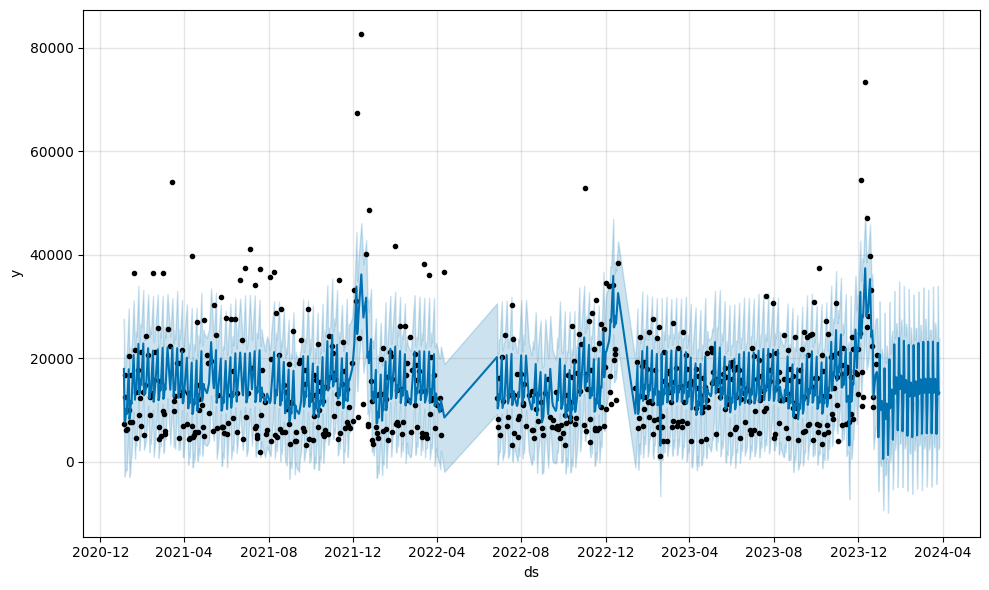

In [9]:
fig1 = m.plot(forecast)



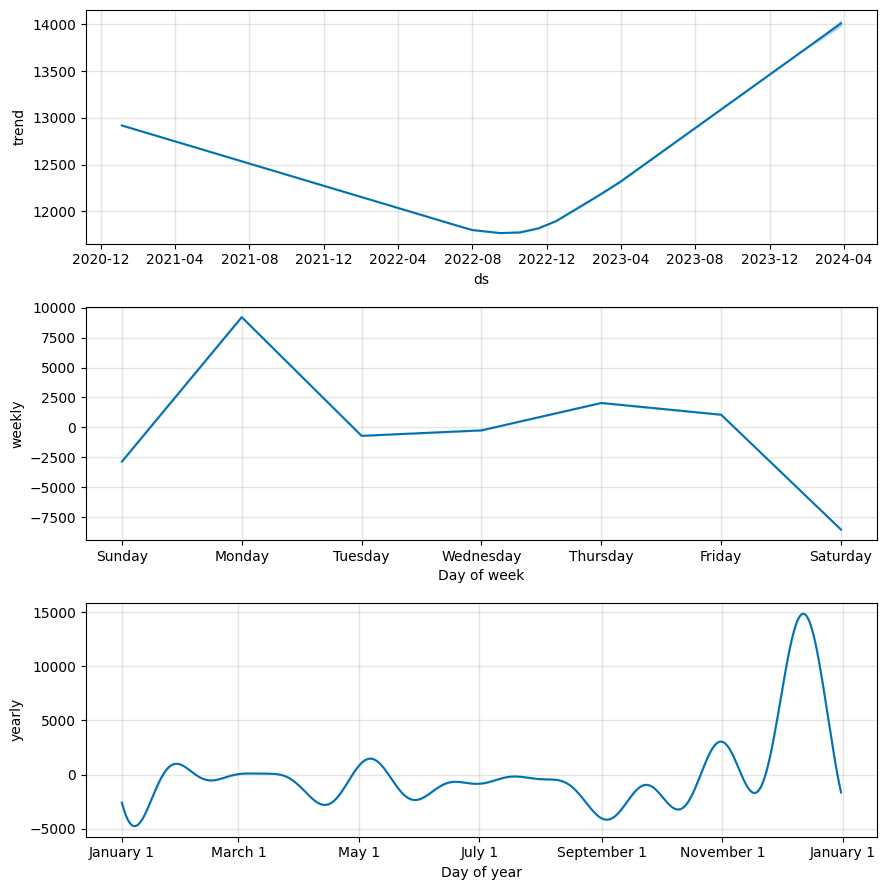

In [10]:
fig2 = m.plot_components(forecast)



In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)



In [13]:
# Compare predicted values with actual values
predicted_values = forecast['yhat']
actual_values = df_prophet['y']

# Calculate the mean absolute error (MAE)
mae = abs(predicted_values - actual_values).mean()

# Calculate the root mean squared error (RMSE)
mse = ((predicted_values - actual_values) ** 2).mean()
rmse = mse ** 0.5

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 6107.432827519515
Root Mean Squared Error (RMSE): 8235.746036699855
